<a href="https://colab.research.google.com/github/siddharthprakash1/GoogleCollabNotebooks/blob/main/ANN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train, x_test=x_train/255.0 , x_test/255.0#so here we are normalising the data
print("x_train.shape:",x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


n=60,000

In [7]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

this has 2 input layers one with 128 and the other with 10 neurons.

In [11]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [12]:
r=model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2948 - accuracy: 0.9147 - val_loss: 0.1388 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1423 - accuracy: 0.9568 - val_loss: 0.1030 - val_accuracy: 0.9680
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1058 - accuracy: 0.9674 - val_loss: 0.0887 - val_accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0871 - accuracy: 0.9729 - val_loss: 0.0840 - val_accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0761 - accuracy: 0.9763 - val_loss: 0.0817 - val_accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0672 - accuracy: 0.9790 - val_loss: 0.0734 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0598 - accuracy: 0.9803 - val_loss: 0.0736 - val_accuracy:

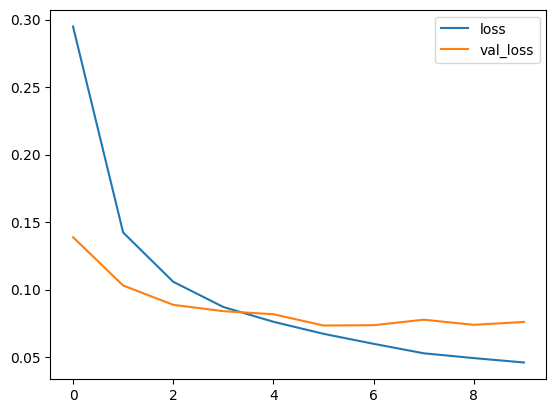

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

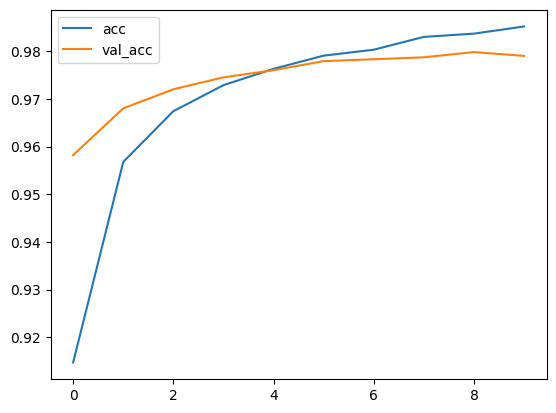

In [17]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label="val_acc")
plt.legend()

In [18]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0760 - accuracy: 0.9790
[0.07599977403879166, 0.9789999723434448]


In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools


313/313 [==============================] - 2s 5ms/step
Confusion Matrix without normalisation
[[ 972    1    1    1    0    1    1    1    1    1]
 [   0 1122    4    1    0    1    3    2    2    0]
 [   0    0 1019    0    1    0    2    5    5    0]
 [   0    0    7  987    1    3    0    5    2    5]
 [   1    0    3    1  961    0    6    1    0    9]
 [   2    1    0   11    2  863    4    2    4    3]
 [   4    2    0    1    4    5  940    0    2    0]
 [   1    1    9    4    0    0    0 1008    1    4]
 [   4    0    7    1    2    4    5    5  941    5]
 [   0    2    1    6   11    1    2    6    3  977]]


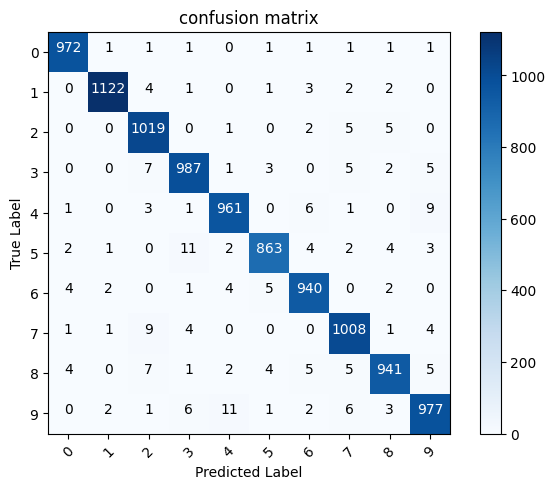

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matric")
  else:
    print("Confusion Matrix without normalisation")
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white' if cm[i, j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)))


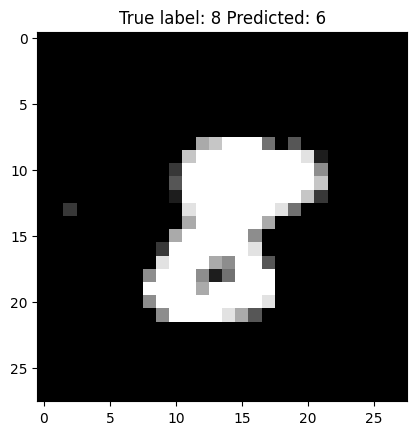

In [26]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
